## Import library

In [ ]:
pip install arff

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for arff: filename=arff-0.9-py3-none-any.whl size=4971 sha256=8aab985ab8750a7ca2823fbb276d41d2bd5f22b44359651f15bd767e2fe71784
  Stored in directory: /root/.cache/pip/wheels/fe/81/bd/4ae90e24ba860304e375da219f9205b2586dbee255f3ee70e2
Successfully built arff


In [ ]:
import numpy as np
import random
import pandas as pd
import torch
import os
import subprocess
from collections import Counter
import arff
import seaborn as sns

from scipy.io import arff as arff_new
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

## MPCK-M

In [ ]:
class MPCKMeans():
  def __init__(self):
    pass

  def get_ARI(self, assignment, labels):
    predict = []
    for line in open(assignment).readlines():
      temp_x,temp_y = line.split()
      x = float(temp_x)
      y = float(temp_y)
      predict.append(y)
    predict = np.asarray(predict).reshape(-1,)
    return adjusted_rand_score(predict,labels.reshape(-1,))

  def get_AMI(self, assignment, labels):
    predict = []
    for line in open(assignment).readlines():
      temp_x,temp_y = line.split()
      x = float(temp_x)
      y = float(temp_y)
      predict.append(y)
    predict = np.asarray(predict).reshape(-1,)
    return adjusted_mutual_info_score(predict,labels.reshape(-1,))

  def run_MPCK(self, arff, constraints, save_file, number_classes, other=''):
    subprocess.run("java weka/clusterers/MPCKMeans -D data/"+ arff +" -C data/" + constraints + " -O " + save_file + " -N "+ str(number_classes) + other, shell=True, stdout=subprocess.PIPE)

  def constraints_setup(self, df, number_of_constraints, file_name):
    # text_file = open(r"/content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest/data/"+file_name, "w")
    # number_of_rows = df.shape[0]
    # number_of_ML = round(number_of_constraints/2)
    # number_of_CL = number_of_constraints - number_of_ML

    # ## ML Setup
    # indices_ML = []
    # while len(indices_ML) < number_of_ML:
    #   indices1 = random.randint(0,number_of_rows-1)
    #   class1 = df['class'][indices1]
    #   indices2 = random.choice(df.loc[df['class']==class1].index)
    #   if indices1 == indices2:
    #     continue
    #   if df.iloc[indices1]['class'] == df.iloc[indices2]['class']:
    #     indices_ML.append([indices1, indices2])

    # ##CL Setup
    # indices_CL = []
    # while len(indices_CL) < number_of_CL:
    #   indices3 = random.randint(0,number_of_rows-1)
    #   indices4 = random.randint(0,number_of_rows-1)
    #   if df.iloc[indices3]['class'] != df.iloc[indices4]['class']:
    #     indices_CL.append([indices3, indices4])

    # for tuple in indices_ML:
    #   text_file.write(str(tuple[0])+'\t'+str(tuple[1])+'\t'+str(1)+'\n')
    # for tuple in indices_CL:
    #   text_file.write(str(tuple[0])+'\t'+str(tuple[1])+'\t'+str(-1)+'\n')
    # text_file.close()

    text_file = open(r"/content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest/data/"+file_name, "w")
    number_of_rows = df.shape[0]
    ind1, ind2, ind3, ind4 = [], [], [], []
    while number_of_constraints > 0:
      tmp1 = random.randint(0, number_of_rows - 1)
      tmp2 = random.randint(0, number_of_rows - 1)
      if tmp1 == tmp2:
          continue
      if df['class'][tmp1] == df['class'][tmp2]:
          ind1.append(tmp1)
          ind2.append(tmp2)
      else:
          ind3.append(tmp1)
          ind4.append(tmp2)
      number_of_constraints -= 1

    for i in range(len(ind3)):
      text_file.write(str(ind3[i])+'\t'+str(ind4[i])+'\t'+str(-1)+'\n')  
    for i in range(len(ind1)):
      text_file.write(str(ind1[i])+'\t'+str(ind2[i])+'\t'+str(1)+'\n')
    text_file.close()


## Sanity check on Iris Dataset

In [ ]:
### Iris dataset
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
irisdf = pd.DataFrame(X)
irisdf['class']=y

In [ ]:
cd /content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest/

/content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest


In [ ]:
number_of_iterations = 5
constraints_list = [10, 300, 600, 900, 1200]
output = []
m_weight = [1, 3, 5]
c_weight = [1, 3, 5]
smartContract = MPCKMeans()
for i in range(number_of_iterations):
  for t in [1,4]:
    for m in m_weight:
  # smartContract.constraints_setup(df=irisdf, number_of_constraints=9, file_name="IRIS.constraints")
      for constraints in constraints_list:
        smartContract.constraints_setup(df=irisdf, number_of_constraints=constraints, file_name="iris.constraints")
        smartContract.run_MPCK(arff="iris.arff", constraints="iris.constraints", save_file="iris_"+str(constraints)+".assignments", number_classes=3, other=" -m "+str(m) + ' -T '+str(t))
        ari = smartContract.get_ARI("iris_"+str(constraints)+".assignments",y)
        ami = smartContract.get_AMI("iris_"+str(constraints)+".assignments",y)
        output.append([i, t, m, constraints, ari, ami])
    # smartContract.add_constraints(irisdf, 300, file_name="IRIS.constraints")

In [ ]:
simulation = pd.DataFrame(output, columns=['Iteration','Trainable', 'M_weight', 'Constraints', 'ARI', 'AMI'])

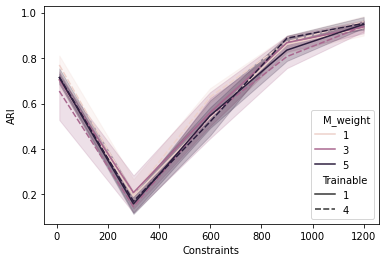

In [ ]:
sns.lineplot(data=simulation,x='Constraints', y='ARI',  hue='M_weight', style='Trainable')

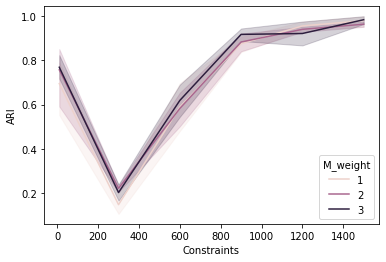

In [ ]:
sns.lineplot(data=simulation,x='Constraints', y='ARI', hue='M_weight')

In [ ]:
### K Means Clustering
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
adjusted_rand_score(y,kmeans.labels_)

0.7302382722834697

In [ ]:
### MPCK Means with more constraints
predict = []
for line in open('iris_1500.assignments').readlines():
       temp_x1,temp_x2 = line.split()
       x1 = float(temp_x1)
       x2 = float(temp_x2)
       predict.append(x2)
predict = np.asarray(predict).reshape(-1,)
adjusted_rand_score(y, predict)

1.0

## Smart Contract dataset

### Preparation

In [ ]:
cd /content/drive/MyDrive/MIE8888/Smart Contract/

/content/drive/MyDrive/MIE8888/Smart Contract


In [ ]:
vectors = torch.load("vectors.pt", map_location=torch.device('cpu')).detach().cpu().numpy()
labels = torch.load("labels.pt", map_location=torch.device('cpu')).detach().cpu().numpy().reshape(-1,1)
print(vectors.shape)
print(labels.shape)

(22443, 256)
(22443, 1)


In [ ]:
cd /content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest/data/

/content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest/data


In [ ]:
### SmartContract dataset has 90 classes
data = pd.DataFrame(vectors, index=None)
data['class'] = labels
data['class'] = data['class'].apply(int)
data['class'] = data['class'].apply(str)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,class
0,0.111661,0.034962,0.025885,0.0,0.0,0.0,0.079101,0.0,0.048922,0.086890,...,0.694713,0.589244,0.415348,0.021515,0.247651,0.131002,0.075833,0.0,0.108983,1
1,0.111661,0.034962,0.025885,0.0,0.0,0.0,0.079101,0.0,0.048922,0.086890,...,0.694713,0.589244,0.415348,0.021515,0.247651,0.131002,0.075833,0.0,0.108983,1
2,0.111661,0.034962,0.025885,0.0,0.0,0.0,0.079101,0.0,0.048922,0.077186,...,0.694713,0.589244,0.415348,0.024312,0.247651,0.124732,0.075833,0.0,0.108983,1
3,0.111661,0.034962,0.025885,0.0,0.0,0.0,0.079101,0.0,0.048922,0.086890,...,0.694713,0.589244,0.415348,0.021515,0.247651,0.131002,0.075833,0.0,0.108983,1
4,0.111661,0.034962,0.025885,0.0,0.0,0.0,0.079101,0.0,0.048922,0.086890,...,0.694713,0.589244,0.415348,0.021515,0.247651,0.131002,0.075833,0.0,0.108983,1


In [ ]:
### Export to ARFF
# arff.dump('smartContract.arff', data.values)

### Implementation

In [ ]:
number_of_iterations = 10
constraints_list = [25, 300, 600, 900, 1200, 1500]
output = []
smartContract = MPCKMeans()
for i in range(number_of_iterations):
  # smartContract.constraints_setup(df=irisdf, number_of_constraints=9, file_name="IRIS.constraints")
  for constraints in constraints_list:
    smartContract.constraints_setup(df=data, number_of_constraints=constraints, file_name="smartContract.constraints")
    smartContract.run_MPCK("smartContract.arff","smartContract.constraints", "smartContract_constraints_"+str(constraints)+".assignments", 90)
    ari = smartContract.get_ARI("smartContract_constraints_"+str(constraints)+".assignments",labels)
    ami = smartContract.get_AMI("smartContract_constraints_"+str(constraints)+".assignments",labels)
    output.append([i, constraints, ari, ami])
    # smartContract.add_constraints(irisdf, 300, file_name="IRIS.constraints")

In [ ]:
simulation = pd.DataFrame(output, columns=['Iteration', 'Constraints', 'ARI', 'AMI'])

In [ ]:
sns.lineplot(data=simulation,x='Constraints', y='ARI')

In [ ]:
sns.lineplot(data=simulation,x='Constraints', y='AMI')

In [ ]:
### K-Means
kmeans = KMeans(n_clusters=90, random_state=1).fit(data.iloc[:,:-1].values)
predict = kmeans.labels_.reshape(-1,)
print("ARI",adjusted_rand_score(labels.reshape(-1,), predict))
print("AMI",adjusted_mutual_info_score(labels.reshape(-1,), predict))

ARI 0.7521280907179212
AMI 0.9024475147017593


In [ ]:
number_of_iterations = 20
constraints_list = [25,50,75,100,125,150,175,200,225,250]
output = []
smartContract = MPCKMeans(data)
for i in range(number_of_iterations):
  for j, constraints in enumerate(constraints_list):
    smartContract.constraints_setup(constraints)

    smartContract.run_MPCK("smartContract_"+str(constraints)+".constraints", "smartContract_constraints_"+str(constraints)+".assignments")
    ari = smartContract.get_ARI("smartContract_constraints_"+str(constraints)+".assignments",labels)
    ami = smartContract.get_AMI("smartContract_constraints_"+str(constraints)+".assignments",labels)
    output.append([i, constraints, ari, ami])

In [ ]:
output

[[0, 25, 0.5101366828710914, 0.839558303539965],
 [0, 50, 0.4597548298816055, 0.8142291178166153],
 [0, 75, 0.5639000636938886, 0.842231914238852],
 [0, 100, 0.6055211297817782, 0.8646616222672007],
 [0, 125, 0.6237182126891436, 0.8600575002340988],
 [0, 150, 0.5073502794031906, 0.8415538937747826],
 [0, 175, 0.6138033124891193, 0.8608870862765778],
 [0, 200, 0.6938189098041857, 0.8858402599749008],
 [0, 225, 0.6699068913203935, 0.872548085049711],
 [0, 250, 0.6680665631977537, 0.8754064217233889],
 [1, 25, 0.3961372982266604, 0.81118463218786],
 [1, 50, 0.437825769201604, 0.8082903298459311],
 [1, 75, 0.5178588536659039, 0.8303152822873682],
 [1, 100, 0.6091726678418432, 0.8620289617053368],
 [1, 125, 0.642633209331816, 0.8663163639363826],
 [1, 150, 0.624667820437, 0.864624990624372],
 [1, 175, 0.6548232627881049, 0.8742002912382321],
 [1, 200, 0.6473154207840484, 0.8754839121280037],
 [1, 225, 0.6649771186496234, 0.8757852005588941],
 [1, 250, 0.637467336478743, 0.8733317390304065],

In [ ]:
np.savetxt('simulation.csv',np.array(output), delimiter=',')

In [ ]:
simulation = pd.DataFrame(output, columns=['Iteration', 'Constraints', 'ARI', 'AMI'])
simulation

,Iteration,Constraints,ARI,AMI
0,0,25,0.510137,0.839558
1,0,50,0.459755,0.814229
2,0,75,0.563900,0.842232
3,0,100,0.605521,0.864662
4,0,125,0.623718,0.860058
...,...,...,...,...
195,19,150,0.593792,0.856909
196,19,175,0.644225,0.868382
197,19,200,0.596328,0.856126
198,19,225,0.680745,0.884367


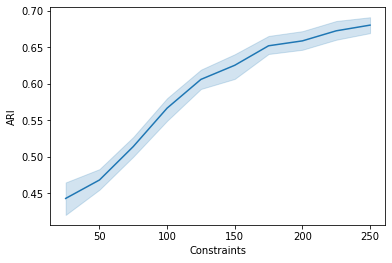

In [ ]:
sns.lineplot(data=simulation,x='Constraints', y='ARI')

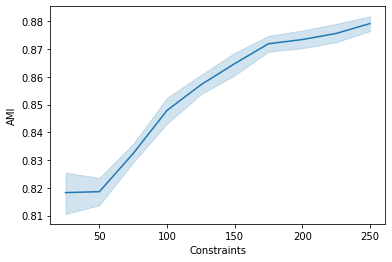

In [ ]:
sns.lineplot(data=simulation,x='Constraints', y='AMI')

### Explore on subset

In [ ]:
def sub_dataset(df, number_of_classes):
  classes = random.choices(pd.unique(df['class']),k=number_of_classes)

  subset = df.loc[df['class'].isin(classes)].reset_index(drop=True)

  arff.dump('smartContract_'+str(number_of_classes)+'.arff', subset.values)
  
  return subset

#### 5 classes

In [ ]:
cd /content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest/data

/content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest/data


In [ ]:
### Create subset and subset labels
subset = sub_dataset(data, number_of_classes=5)
subset_labels = subset['class'].values

In [ ]:
### Check classes and number of cases in each class
Counter(subset_labels)

Counter({'31': 309, '50': 304, '110': 480, '111': 109})

In [ ]:
cd /content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest

/content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest


In [ ]:
number_of_iterations = 5
constraints_list = [25, 500, 1000, 2000, 4000, 8000, 12000]
output = []
smartContract = MPCKMeans()
for i in range(number_of_iterations):
  # smartContract.constraints_setup(df=irisdf, number_of_constraints=9, file_name="IRIS.constraints")
  for constraints in constraints_list:
    smartContract.constraints_setup(df=subset, number_of_constraints=constraints, file_name="smartContract.constraints")
    smartContract.run_MPCK("smartContract_5.arff","smartContract.constraints", "smartContract_constraints_"+str(constraints)+".assignments", number_classes=5)
    ari = smartContract.get_ARI("smartContract_constraints_"+str(constraints)+".assignments",subset_labels)
    ami = smartContract.get_AMI("smartContract_constraints_"+str(constraints)+".assignments",subset_labels)
    output.append([i, constraints, ari, ami])
    # smartContract.add_constraints(irisdf, 300, file_name="IRIS.constraints")

In [ ]:
simulation = pd.DataFrame(output, columns=['Iteration', 'Constraints', 'ARI', 'AMI'])
simulation

,Iteration,Constraints,ARI,AMI
0,0,25,0.589457,0.728976
1,0,500,0.682278,0.763215
2,0,1000,0.526929,0.610307
3,0,2000,0.497787,0.545896
4,0,4000,0.664506,0.593970
5,0,8000,0.827616,0.761594
6,0,12000,0.886015,0.852481
7,1,25,0.782319,0.864942
8,1,500,0.655952,0.731117
9,1,1000,0.670582,0.704741


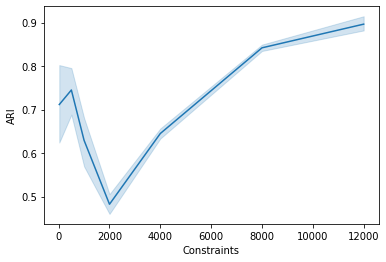

In [ ]:
sns.lineplot(data=simulation,x='Constraints', y='ARI')

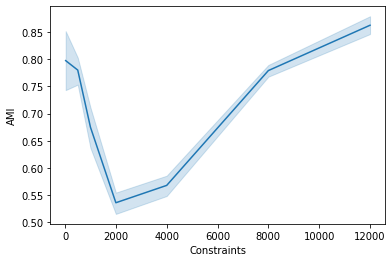

In [ ]:
sns.lineplot(data=simulation,x='Constraints', y='AMI')

In [ ]:
### K-Means
kmeans = KMeans(n_clusters=5, random_state=1).fit(subset.iloc[:,:-1].values)
predict = kmeans.labels_.reshape(-1,)
print("ARI",adjusted_rand_score(subset_labels.reshape(-1,), predict))
print("AMI",adjusted_mutual_info_score(subset_labels.reshape(-1,), predict))

ARI 0.7864699595800685
AMI 0.8705815886203914


#### 10 classes

In [ ]:
cd /content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest/data

/content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest/data


In [ ]:
subset = sub_dataset(data, number_of_classes=10)
subset_labels = subset['class'].values

In [ ]:
Counter(subset_labels)

Counter({'7': 192,
         '8': 104,
         '14': 154,
         '19': 129,
         '56': 124,
         '70': 213,
         '74': 120,
         '92': 498,
         '111': 109})

In [ ]:
cd /content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest

/content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest


In [ ]:
number_of_iterations = 3
constraints_list = [25, 1000, 2000, 5000, 10000, 15000, 20000]
output = []
smartContract = MPCKMeans()
for i in range(number_of_iterations):
  # smartContract.constraints_setup(df=irisdf, number_of_constraints=9, file_name="IRIS.constraints")
  for constraints in constraints_list:
    smartContract.constraints_setup(df=subset, number_of_constraints=constraints, file_name="smartContract.constraints")
    smartContract.run_MPCK(arff="smartContract_10.arff",constraints="smartContract.constraints", save_file="smartContract_constraints_"+str(constraints)+".assignments", number_classes=10)
    ari = smartContract.get_ARI("smartContract_constraints_"+str(constraints)+".assignments",subset_labels)
    ami = smartContract.get_AMI("smartContract_constraints_"+str(constraints)+".assignments",subset_labels)
    output.append([i, constraints, ari, ami])
    # smartContract.add_constraints(irisdf, 300, file_name="IRIS.constraints")

In [ ]:
simulation = pd.DataFrame(output, columns=['Iteration', 'Constraints', 'ARI', 'AMI'])
simulation

,Iteration,Constraints,ARI,AMI
0,0,25,0.501400,0.761707
1,0,1000,0.471117,0.698920
2,0,2000,0.419399,0.641463
3,0,5000,0.689840,0.666186
4,0,10000,0.848723,0.755452
5,0,15000,0.730185,0.829962
6,0,20000,0.948644,0.922789
7,1,25,0.670408,0.810618
8,1,1000,0.564329,0.755664
9,1,2000,0.436038,0.639426


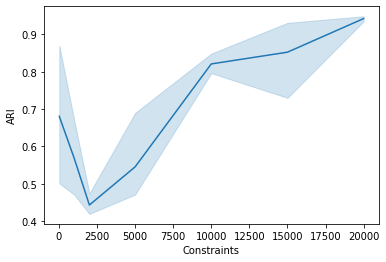

In [ ]:
sns.lineplot(data=simulation,x='Constraints', y='ARI')

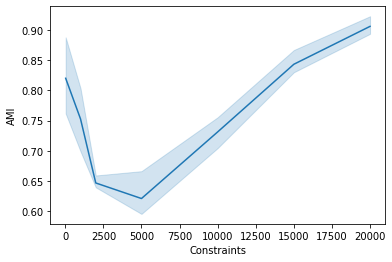

In [ ]:
sns.lineplot(data=simulation,x='Constraints', y='AMI')

In [ ]:
### K-Means
kmeans = KMeans(n_clusters=10, random_state=0).fit(subset.iloc[:,:-1].values)
predict = kmeans.labels_.reshape(-1,)
print("ARI",adjusted_rand_score(subset_labels.reshape(-1,), predict))
print("AMI",adjusted_mutual_info_score(subset_labels.reshape(-1,), predict))

ARI 0.7323999765804644
AMI 0.892335642024826


#### 15 classes

In [ ]:
cd /content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest/data

/content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest/data


In [ ]:
subset = sub_dataset(data, number_of_classes=15)
subset_labels = subset['class'].values

In [ ]:
Counter(subset_labels)

Counter({'2': 139,
         '16': 180,
         '22': 116,
         '24': 248,
         '44': 406,
         '48': 384,
         '54': 283,
         '57': 156,
         '70': 213,
         '78': 220,
         '82': 344,
         '87': 500,
         '112': 281,
         '117': 334})

In [ ]:
cd /content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest

/content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest


In [ ]:
number_of_iterations = 3
constraints_list = [25, 1000, 2000, 5000, 10000, 15000, 20000]
output = []
smartContract = MPCKMeans()
for i in range(number_of_iterations):
  # smartContract.constraints_setup(df=irisdf, number_of_constraints=9, file_name="IRIS.constraints")
  for constraints in constraints_list:
    smartContract.constraints_setup(df=subset, number_of_constraints=constraints, file_name="smartContract.constraints")
    smartContract.run_MPCK("smartContract_15.arff","smartContract.constraints", "smartContract_constraints_"+str(constraints)+".assignments", number_classes=15)
    ari = smartContract.get_ARI("smartContract_constraints_"+str(constraints)+".assignments",subset_labels)
    ami = smartContract.get_AMI("smartContract_constraints_"+str(constraints)+".assignments",subset_labels)
    output.append([i, constraints, ari, ami])
    # smartContract.add_constraints(irisdf, 300, file_name="IRIS.constraints")

In [ ]:
simulation = pd.DataFrame(output, columns=['Iteration', 'Constraints', 'ARI', 'AMI'])
simulation

,Iteration,Constraints,ARI,AMI
0,0,25,0.640209,0.843136
1,0,1000,0.690227,0.835659
2,0,2000,0.622507,0.791202
3,0,5000,0.492231,0.695320
4,0,10000,0.525345,0.674006
5,0,15000,0.685006,0.754374
6,0,20000,0.781251,0.806162
7,1,25,0.563327,0.781497
8,1,1000,0.693178,0.815379
9,1,2000,0.629167,0.791102


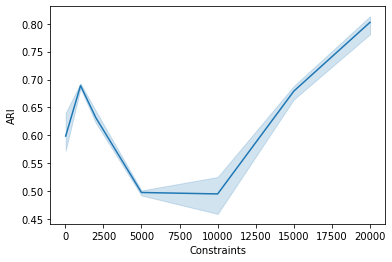

In [ ]:
sns.lineplot(data=simulation,x='Constraints', y='ARI')

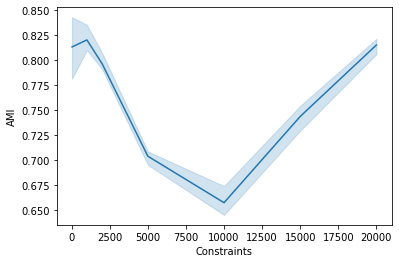

In [ ]:
sns.lineplot(data=simulation,x='Constraints', y='AMI')

In [ ]:
### K-Means
kmeans = KMeans(n_clusters=15, random_state=0).fit(subset.iloc[:,:-1].values)
predict = kmeans.labels_.reshape(-1,)
print("ARI",adjusted_rand_score(subset_labels.reshape(-1,), predict))
print("AMI",adjusted_mutual_info_score(subset_labels.reshape(-1,), predict))

ARI 0.7635041101177316
AMI 0.8945009698854473


#### 20 classes

In [ ]:
cd /content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest/data

/content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest/data


In [ ]:
subset = sub_dataset(data, number_of_classes=20)
subset_labels = subset['class'].values

In [ ]:
cd /content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest

/content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest


In [ ]:
number_of_iterations = 3
constraints_list = [25, 1000, 2000, 5000, 10000, 20000, 30000]
output = []
smartContract = MPCKMeans()
for i in range(number_of_iterations):
  # smartContract.constraints_setup(df=irisdf, number_of_constraints=9, file_name="IRIS.constraints")
  for constraints in constraints_list:
    smartContract.constraints_setup(df=subset, number_of_constraints=constraints, file_name="smartContract.constraints")
    smartContract.run_MPCK("smartContract_20.arff","smartContract.constraints", "smartContract_constraints_"+str(constraints)+".assignments", number_classes=20)
    ari = smartContract.get_ARI("smartContract_constraints_"+str(constraints)+".assignments",subset_labels)
    ami = smartContract.get_AMI("smartContract_constraints_"+str(constraints)+".assignments",subset_labels)
    output.append([i, constraints, ari, ami])
    # smartContract.add_constraints(irisdf, 300, file_name="IRIS.constraints")

In [ ]:
simulation = pd.DataFrame(output, columns=['Iteration', 'Constraints', 'ARI', 'AMI'])
simulation

,Iteration,Constraints,ARI,AMI
0,0,25,0.655680,0.834690
1,0,1000,0.751218,0.862434
2,0,2000,0.706224,0.837078
3,0,5000,0.549933,0.761446
4,0,10000,0.460612,0.672593
5,0,20000,0.703370,0.784147
6,0,30000,0.903539,0.893907
7,1,25,0.688043,0.852221
8,1,1000,0.668721,0.827621
9,1,2000,0.755641,0.848565


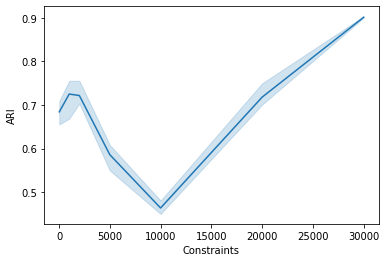

In [ ]:
sns.lineplot(data=simulation,x='Constraints', y='ARI')

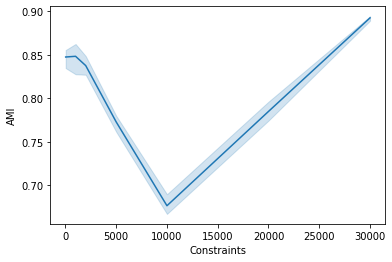

In [ ]:
sns.lineplot(data=simulation,x='Constraints', y='AMI')

In [ ]:
### K-Means
kmeans = KMeans(n_clusters=20, random_state=0).fit(subset.iloc[:,:-1].values)
predict = kmeans.labels_.reshape(-1,)
print("ARI",adjusted_rand_score(subset_labels.reshape(-1,), predict))
print("AMI",adjusted_mutual_info_score(subset_labels.reshape(-1,), predict))

ARI 0.8606435819512152
AMI 0.9178056807761611


## SA dataset

#### Sanity Check

Interactive Prediction using input.java

In [ ]:
cd /content/drive/MyDrive/MIE8888/sanitycheck/code2vec/

/content/drive/MyDrive/MIE8888/sanitycheck/code2vec


In [ ]:
!python3 code2vec.py --load models/java14_model/saved_model_iter8.release --predict --export_code_vectors

#### Implementation

In [ ]:
cd /content/drive/MyDrive/MIE8888/code2vec

/content/drive/MyDrive/MIE8888/code2vec


In [ ]:
!python3 code2vec.py --load models/java14_model/saved_model_iter8.release --export_code_vectors --predict

Streaming output truncated to the last 5000 lines.

SA_code/heap/java/2291.java

SA_code/heap/java/2154.java

SA_code/heap/java/2201.java

SA_code/heap/java/2141.java

SA_code/heap/java/1915.java

SA_code/heap/java/2346.java

SA_code/heap/java/2139.java
Exception in thread "main" com.github.javaparser.ParseProblemException: Encountered unexpected token: "404" <INTEGER_LITERAL>
    at line 1, column 20.

Was expecting one of:

    ";"
    "<"
    "@"
    "abstract"
    "boolean"
    "byte"
    "char"
    "class"
    "default"
    "double"
    "enum"
    "final"
    "float"
    "int"
    "interface"
    "long"
    "native"
    "private"
    "protected"
    "public"
    "short"
    "static"
    "strictfp"
    "synchronized"
    "transient"
    "void"
    "volatile"
    "{"
    "}"
    <IDENTIFIER>


	at com.github.javaparser.JavaParser.simplifiedParse(JavaParser.java:242)
	at com.github.javaparser.JavaParser.parse(JavaParser.java:210)
	at JavaExtractor.FeatureExtractor.parseFileWithRetrie

In [ ]:
SA_df = pd.read_csv('code2vec.csv', header=None)
SA_label = SA_df.iloc[:,-1].values
SA_df = SA_df.drop(384, axis=1)
SA_df['class'] = SA_label

In [ ]:
Counter(SA_label)

Counter({'bfs': 609,
         'bubblesort': 608,
         'stack': 498,
         'quicksort': 609,
         'queue': 355,
         'mergesort': 609,
         'linkedlist': 588,
         'knapsack': 609,
         'heap': 149,
         'dfs': 36})

In [ ]:
cd /content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest/data/

In [ ]:
arff.dump('SA.arff', SA_df.values)

In [ ]:
cd /content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest

/content/drive/MyDrive/MIE8888/MPCK-Means/wekaUT/weka-latest


In [ ]:
number_of_iterations = 20
constraints_list = [0, 25, 50, 75, 100, 125, 150, 175, 200, 500]
output = []
SA = MPCKMeans()
for i in range(number_of_iterations):
  for constraints in constraints_list:
    SA.constraints_setup(df=SA_df, number_of_constraints=constraints, file_name="SA.constraints")
    SA.run_MPCK(arff="SA.arff",constraints="SA.constraints", save_file="SA_constraints.assignments", number_classes=10, other=" -m 3")
    ari = SA.get_ARI("SA_constraints.assignments",SA_label)
    ami = SA.get_AMI("SA_constraints.assignments",SA_label)
    output.append([i, constraints, ari, ami])

In [ ]:
simulation = pd.DataFrame(output, columns=['Iteration', 'Constraints', 'ARI', 'AMI'])

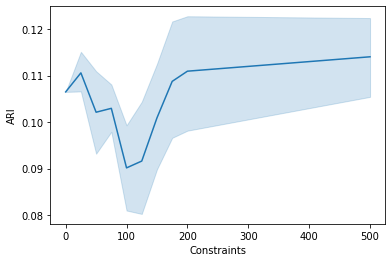

In [ ]:
sns.lineplot(data=simulation,x='Constraints', y='ARI')

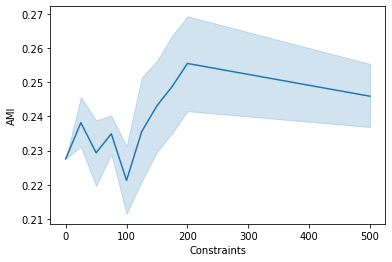

In [ ]:
sns.lineplot(data=simulation,x='Constraints', y='AMI')

In [ ]:
### K-Means
kmeans = KMeans(n_clusters=10, random_state=0).fit(SA_df.iloc[:,:-1].values)
predict = kmeans.labels_.reshape(-1,)
print("ARI",adjusted_rand_score(SA_label.reshape(-1,), predict))
print("AMI",adjusted_mutual_info_score(SA_label.reshape(-1,), predict))

ARI 0.11212810536019494
AMI 0.2525817993515372
